# 闭包概念 
# 匿名函数lambda 
# 装饰器 decorator
# 偏函数 

In [1]:
def closure(*args):
    def summ():
        n=0
        
        for number in args:
            n = n+number
        
        return n

    return summ

In [2]:
f = closure(1,2,3,4,5)

In [3]:
type(f)

function

In [4]:
f()

15

In [5]:
f1 = closure(1,2,3,4,5)
f2 = closure(1,2,3,4,5)

f1 == f2 # 两个不同的函数对象 调用结果互不影响

False

# 闭包概念
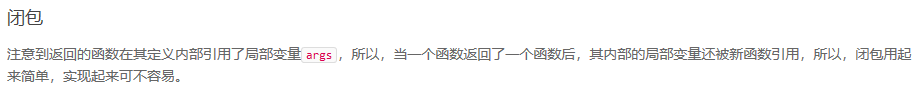
## 闭包返回的函数并没有立即执行 而是调用了f()才开始执行 见下例子

In [6]:
def count():
    fs = [] #每一个元素为函数对象
    
    for i in range(1,4):
        def f():
            return i*i
        
        fs.append(f)
    
    return fs


# 运行下面返回的3个函数 可以发现结果都是9
# 因为返回的函数引用了循环变量i 但是并非立即执行 等到3个函数都返回时
# 它们所引用的变量i已经变为了3 故最终结果为9
# 故使用闭包时 返回的函数不要引用任何循环变量 或者后续会发生变化的变量
f1 , f2 , f3 = count()


In [7]:
f1()

9

In [8]:
f2()

9

In [10]:
f3()

9

In [11]:
# 如果一定要引用循环变量
def count():
    def f(j):
        def g():
            return j**2
        return g
    
    fs = []
    for i in range(1,4):
        fs.append(f(i))
    
    return fs

f1 , f2 , f3 = count()

In [12]:
f1()

1

In [15]:
f2()

4

In [16]:
f3()

9

## 装饰器 decorator 
###### 如果要增强一个函数的功能 但是又不希望修改这个函数 
###### 在代码运行期间动态增加功能的方式 称为装饰器 
###### 装饰器也是高阶函数 返回函数的函数 

In [17]:
def f():
    print('hala')

new_f = f

In [18]:
f.__name__

'f'

In [19]:
new_f.__name__

'f'

In [35]:
def log(func):
    def wrapper(*args , **kw):
        print('called %s' % func.__name__)
        
        return func(*args , **kw)
    
    return wrapper



In [36]:
@log
def f():
    print('hala')

In [39]:
f()

called f
hala


In [40]:
f.__name__ # f已经指向了新的函数

'wrapper'

In [ ]:
#上面的装饰器语法 相当于下面的调用方式
f = log(f)

# log是一个decorator 返回一个函数 所以原来的f函数仍然存在
# 只是现在同名的f变量 指向了新的函数 现在调用f将执行新函数 即在log函数中返回的wrapper函数

In [41]:
#装饰器如果需要传入参数
def log(text):
    def decorator(func):
        def wrapper(*args , **kw):
            print('%s %s' % (text , func.__name__))
            
            return func(*args , **kw)
    
        return wrapper
    
    return decorator

In [42]:
@log('function')
def f():
    print('hala')

In [43]:
f()

function f
hala


In [44]:
# 上面的带有参数的装饰器的效果如下
# log('function') 返回一个函数 返回的是decorator函数 接下来同上面没有参数的decorator一样
f = log('function')(f)

In [46]:
print(f.__name__)

wrapper


# 使用装饰器后返回的函数的名字（__name__属性）是‘wrapper’ 而不是原来的函数名字 
# 在上面的log代码中 添加 wrapper.__name__ = func.__name__ 
# 也可以下面的方法 
# 有些代码依赖函数签名 不进行修改 执行就会出错

In [47]:
# 使用装饰器后返回的函数的名字（__name__属性）是‘wrapper’ 而不是原来的函数名字
# 在上面的log代码中 添加 wrapper.__name__ = func.__name__
# 也可以下面的方法
import functools

def log(func):
    @functools.wraps(func)
    def wrapper(*args , **kw):
        print('call %s' % func.__name__)
        return func(*args , **kw)
    
    return wrapper

In [48]:
@log
def f():
    print('hala')

In [49]:
f()

call f
hala


In [50]:
f.__name__ #为函数的名字

'f'

In [51]:
#修改__name__
#装饰器如果需要传入参数
def log(text):
    def decorator(func):
        @functools.wraps(func)
        def wrapper(*args , **kw):
            print('%s %s' % (text , func.__name__))
            
            return func(*args , **kw)
    
        return wrapper
    
    return decorator

In [52]:
@log('function')
def f():
    print('hala')

In [53]:
f()

function f
hala


In [54]:
f.__name__ #为函数的名字

'f'

# 偏函数 partial 

In [56]:
int('A' , base=16)

10

In [57]:
def int2(x):
    return int(x , base=2) #2进制转换

int2('10101')

21

In [58]:
int2('1010111')

87

In [60]:
#使用偏函数完成上面的2进制转换函数
new_int2 = functools.partial(int , base=2)

In [61]:
new_int2('111101010')

490

In [63]:
# 偏函数把一个函数的某些参数给固定住（也就是设置默认值） 返回一个新的函数
# 上面的写法相当于下面
kw = {'base':2}

int('111101010' , **kw)

490

In [64]:
# 当偏函数如下面的方式使用时
# 实际上会把10作为*args的一部分自动加到左边
max2 = functools.partial(max , 10)



In [67]:
max2(1,2,3,4,1,2,31,2,1)
#上面的代码相当于
args = [10 , 1,2,3,4,1,2,31,2,1]
max(*args)

31

In [66]:
max(1,2,3,1,2,11)

11